In [198]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [199]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [200]:
data = pd.read_csv("../../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")

In [201]:
X = data[features_num]
y = data[[y_column, 'Source', 'AGNfrac_af', 'Radio_excess']]

In [202]:
X.isna().sum(axis=0)

Total_flux                 0
Peak_flux                  0
NUV_flux_corr          19450
u_flux_corr             7724
Bw_flux_corr           60465
R_flux_corr             2103
I_flux_corr             4479
z_flux_corr             3008
y_flux_corr            32610
J_flux_corr            10216
H_flux_corr            60312
K_flux_corr            14495
Ks_flux_corr           60365
ch1_flux_corr            675
ch2_flux_corr             36
ch3_flux_corr           1755
ch4_flux_corr           1359
F_MIPS_24               3756
F_PACS_100               896
F_PACS_160               896
F_SPIRE_250             3971
F_SPIRE_350             3971
F_SPIRE_500             3971
Z_BEST                     0
g_flux_corr            20263
nb921_hsc_flux_corr    49514
dtype: int64

In [203]:
# Temporary fix to weird blob
y = y[X['F_PACS_100']<1e5]
X = X[X['F_PACS_100']<1e5]

In [204]:
list(data.columns)

['Source_Name',
 'RA',
 'DEC',
 'Total_flux',
 'E_Total_flux',
 'Peak_flux',
 'E_Peak_flux',
 'S_Code',
 'EBV',
 'FUV_flux_corr',
 'FUV_fluxerr_corr',
 'NUV_flux_corr',
 'NUV_fluxerr_corr',
 'u_flux_corr',
 'u_fluxerr_corr',
 'Bw_flux_corr',
 'Bw_fluxerr_corr',
 'R_flux_corr',
 'R_fluxerr_corr',
 'I_flux_corr',
 'I_fluxerr_corr',
 'z_flux_corr',
 'z_fluxerr_corr',
 'z_Subaru_flux_corr',
 'z_Subaru_fluxerr_corr',
 'y_flux_corr',
 'y_fluxerr_corr',
 'J_flux_corr',
 'J_fluxerr_corr',
 'H_flux_corr',
 'H_fluxerr_corr',
 'K_flux_corr',
 'K_fluxerr_corr',
 'Ks_flux_corr',
 'Ks_fluxerr_corr',
 'ch1_flux_corr',
 'ch1_fluxerr_corr',
 'ch2_flux_corr',
 'ch2_fluxerr_corr',
 'ch3_flux_corr',
 'ch3_fluxerr_corr',
 'ch4_flux_corr',
 'ch4_fluxerr_corr',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_35

# Dropping columns with little data (optional)

In [205]:
X = X.drop(columns=['NUV_flux_corr', 'Bw_flux_corr', 'y_flux_corr', 'H_flux_corr', 'Ks_flux_corr', 'K_flux_corr',
                   'g_flux_corr', 'nb921_hsc_flux_corr'])

## Filter by thin redshift slice (optional)

<AxesSubplot:>

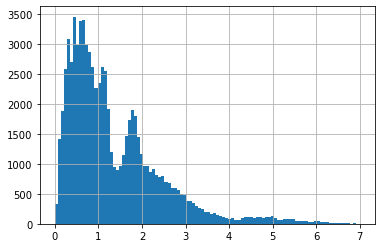

In [206]:
X.Z_BEST.hist(bins=100)

In [207]:
delta_z = 0.5

for z in np.arange(0,4,0.1):
    z = round(z,1)
    print(z, sum((X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))))

0.0 15886
0.1 19512
0.2 21942
0.3 22626
0.4 22036
0.5 20711
0.6 19866
0.7 18578
0.8 16703
0.9 14199
1.0 12181
1.1 10149
1.2 8734
1.3 8989
1.4 10159
1.5 10785
1.6 10663
1.7 9828
1.8 8542
1.9 7132
2.0 6345
2.1 5936
2.2 5538
2.3 5082
2.4 4689
2.5 4215
2.6 3789
2.7 3382
2.8 2948
2.9 2526
3.0 2165
3.1 1862
3.2 1604
3.3 1401
3.4 1206
3.5 1051
3.6 890
3.7 748
3.8 649
3.9 637


In [208]:
z = 0
#z = 3
delta_z = 0.5

redshift_filt = (X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))
X_sliced = X[redshift_filt]

# Dropping redshift column (optional)

In [190]:
#X_sliced = X_sliced.drop(columns='Z_BEST')

# Logging the data (optional)

In [108]:
X_sliced.replace(0, 1e-6, inplace=True)

/Software/users/modules/7/software/anaconda3/2021.11/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [51]:
X_sliced[[c for c in X_sliced.columns if c!='Z_BEST']] = np.log10(X_sliced.drop(columns='Z_BEST'))

/Software/users/modules/7/software/anaconda3/2021.11/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Filling nan's

In [209]:
# fill nans with 0s
#X_filled = X.fillna(0)

# FIlling with mean, filling with 0s caused a weird split into 2 groups
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_filled = imp_mean.fit_transform(X)

imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X_sliced)

## Scaling

In [210]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

scaler = StandardScaler()
X_final = scaler.fit_transform(X_filled)

## Running UMAP

In [211]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.1)
embedding = reducer.fit_transform(X_final)

In [212]:
embedding.shape

(15886, 2)

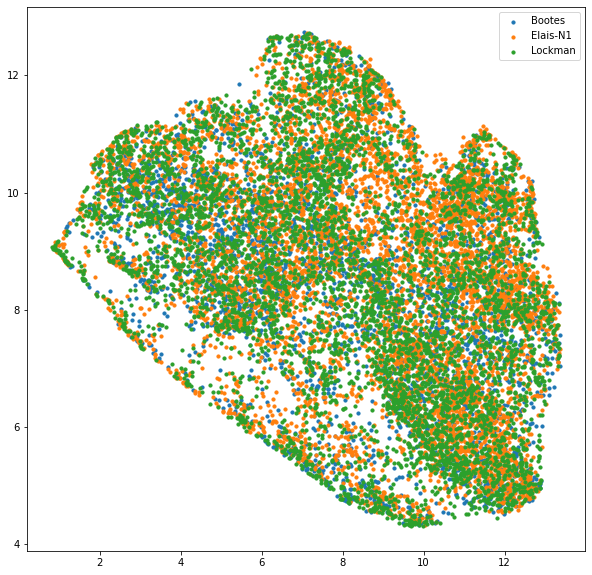

In [213]:
plt.figure(figsize=(10,10))

for i in y['Source'].unique():
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Source'][redshift_filt]==i
    plt.scatter(embedding[:,0][filt], embedding[:,1][filt], s=10,label=i)
plt.legend()
#plt.xlim(xmax=5)
plt.show()

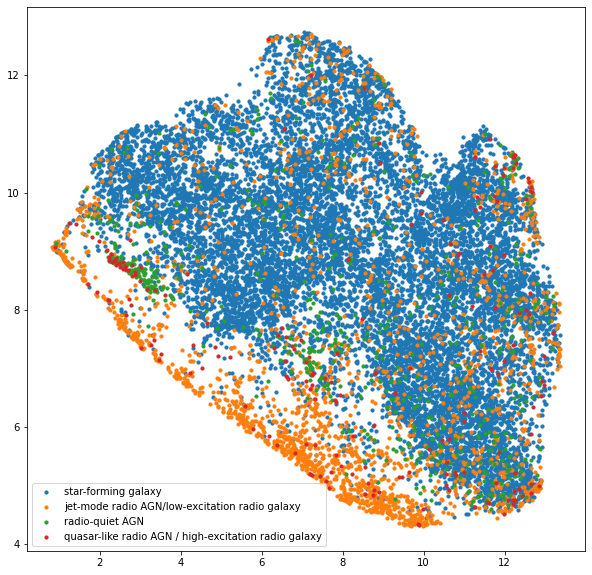

In [214]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Classification'][redshift_filt]==i
    plt.scatter(embedding[:,0][filt], embedding[:,1][filt], s=10,label=i)
plt.legend()
#plt.xlim(xmax=5)
plt.show()

In [69]:
tempdata = np.hstack((X_filled, embedding, y['Classification'][redshift_filt].to_numpy()[:, np.newaxis]))
columns = list(X.columns)
columns.extend(['x', 'y', 'class'])

temp = pd.DataFrame(data=tempdata, columns=columns)
temp.to_csv('temp.csv', index=False)

## In a loop

Working on number of neighbours 10
Working on number of neighbours 20
Working on number of neighbours 30
Working on number of neighbours 40
Working on number of neighbours 50
Working on number of neighbours 60
Working on number of neighbours 70
Working on number of neighbours 80
Working on number of neighbours 90
Working on number of neighbours 100
Working on number of neighbours 110
Working on number of neighbours 120
Working on number of neighbours 130
Working on number of neighbours 140
Working on number of neighbours 150
Working on number of neighbours 160
Working on number of neighbours 170
Working on number of neighbours 180
Working on number of neighbours 190
Working on number of neighbours 200


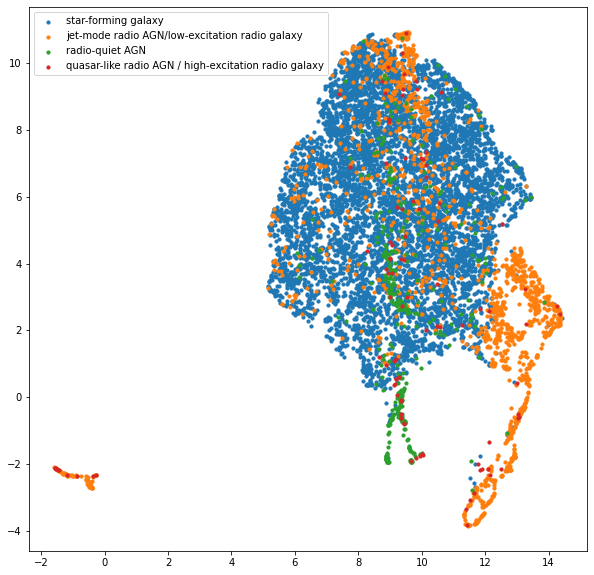

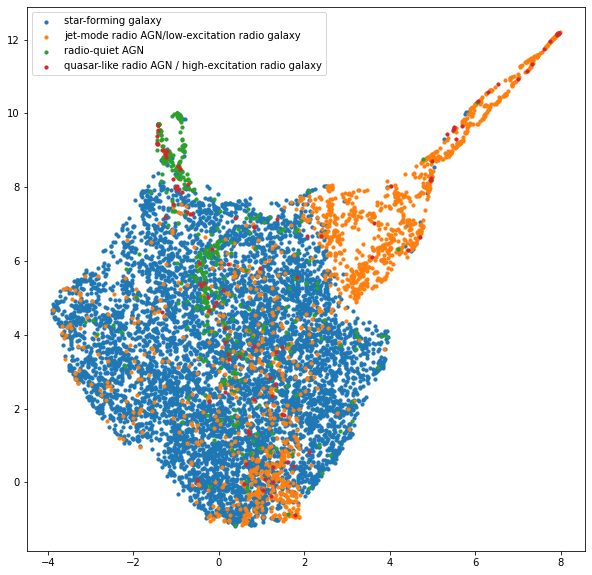

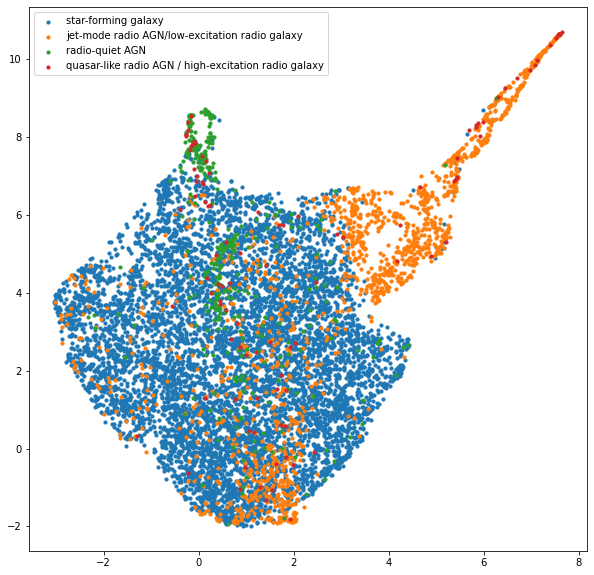

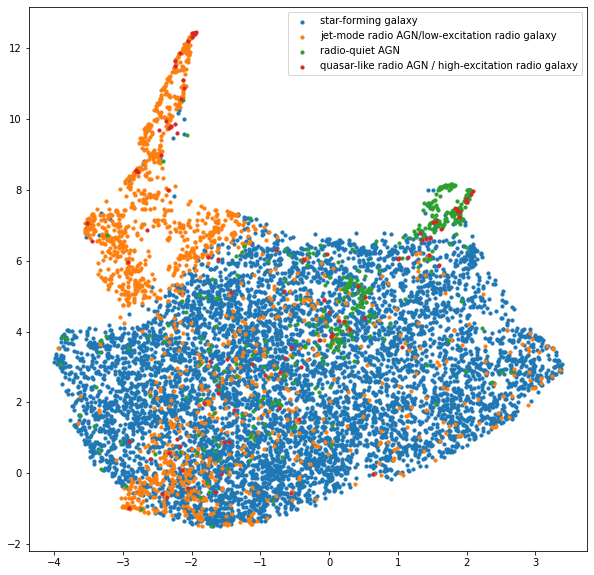

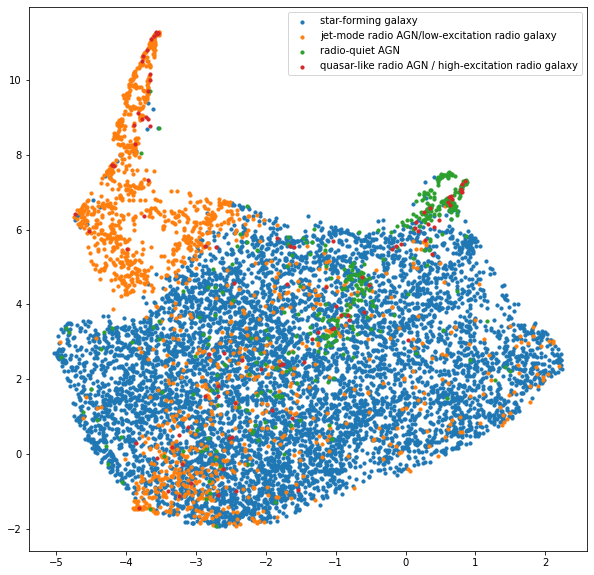

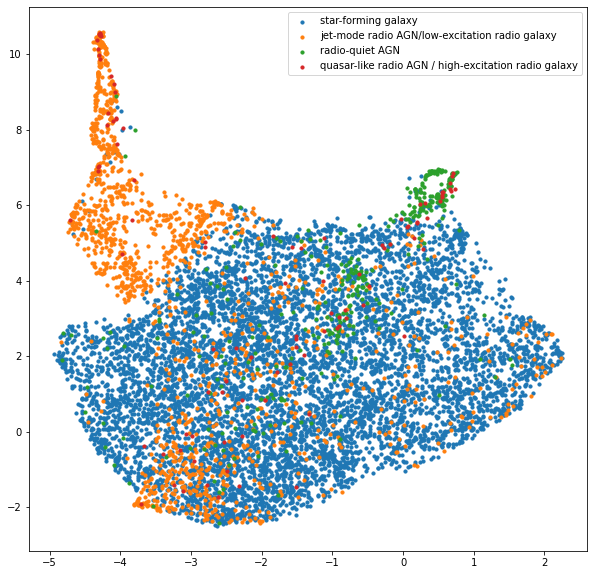

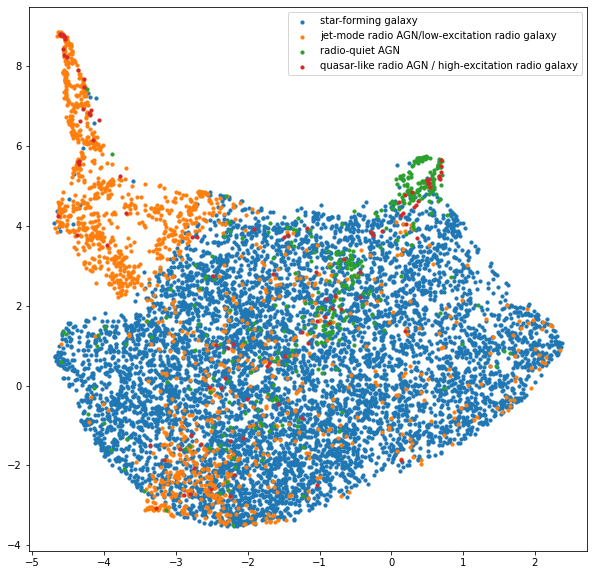

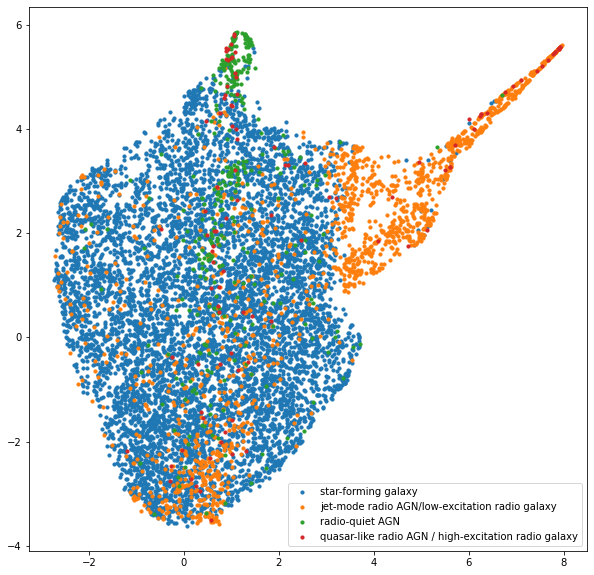

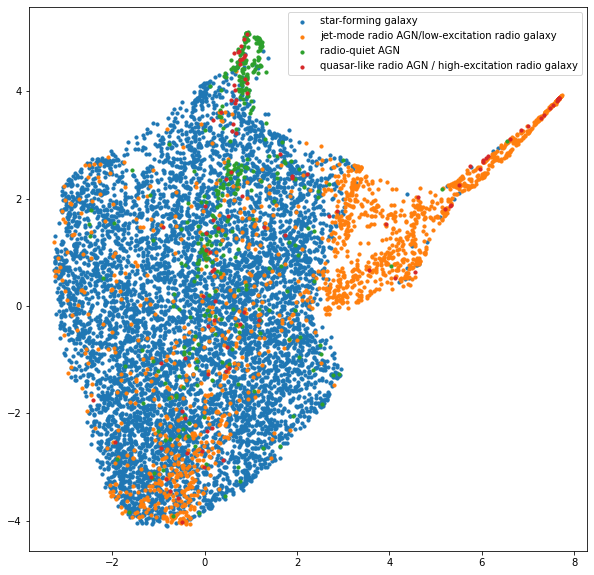

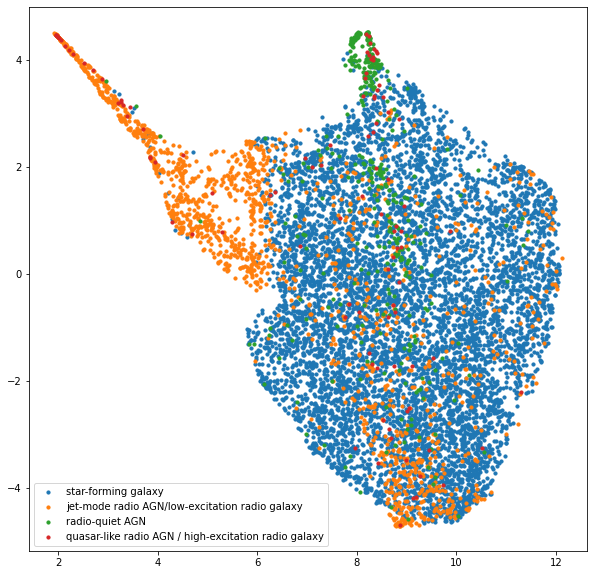

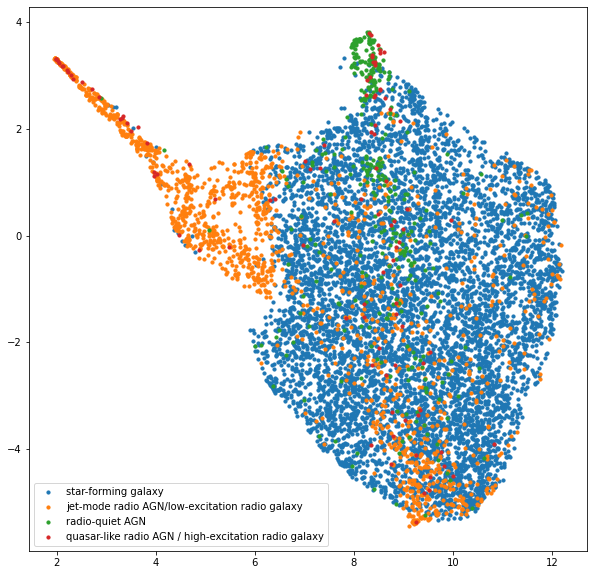

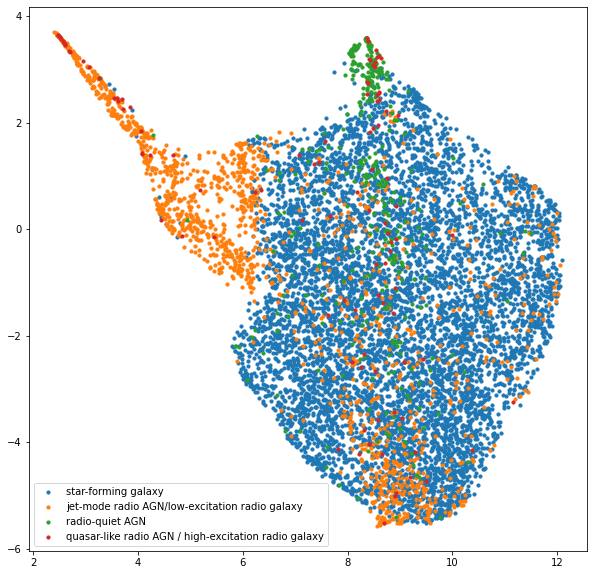

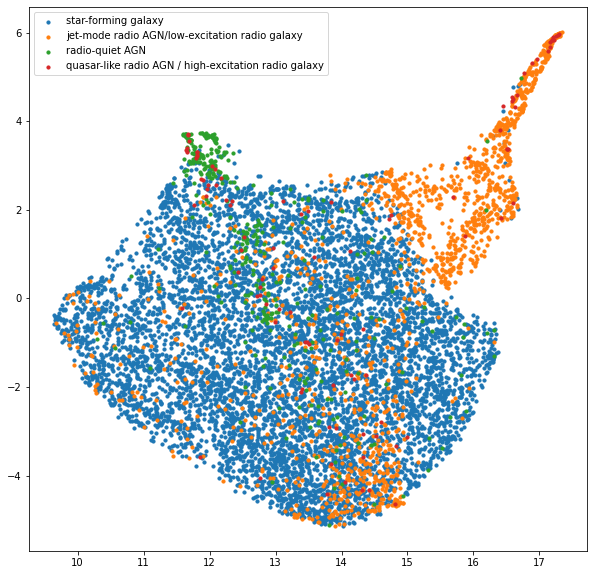

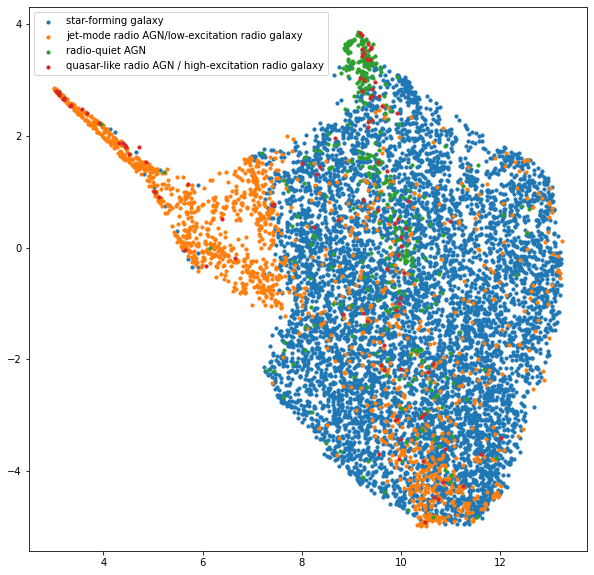

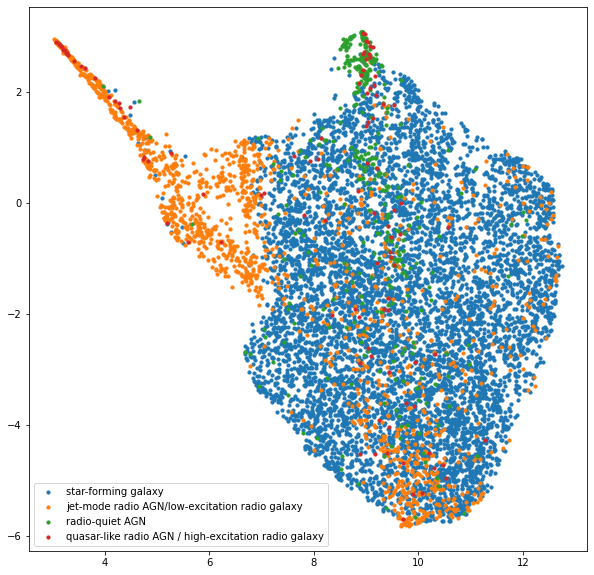

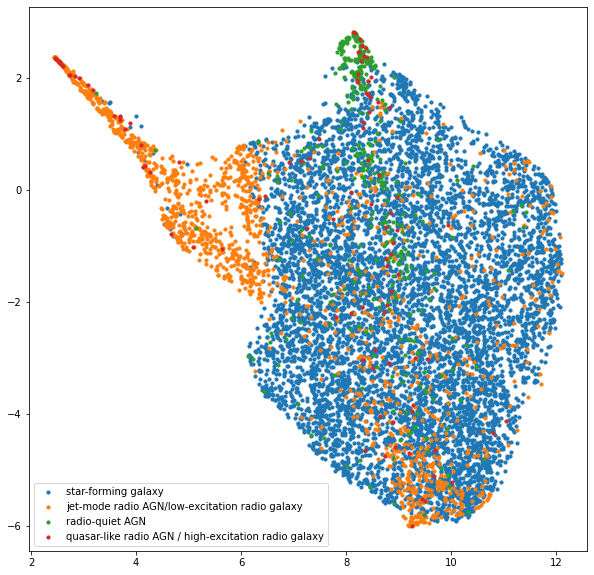

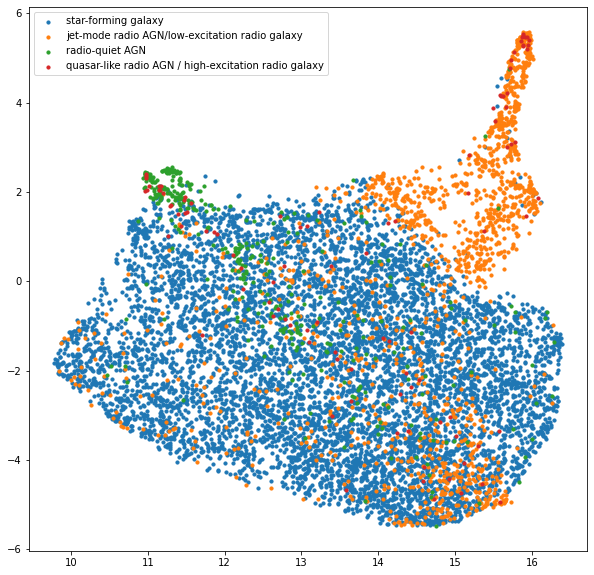

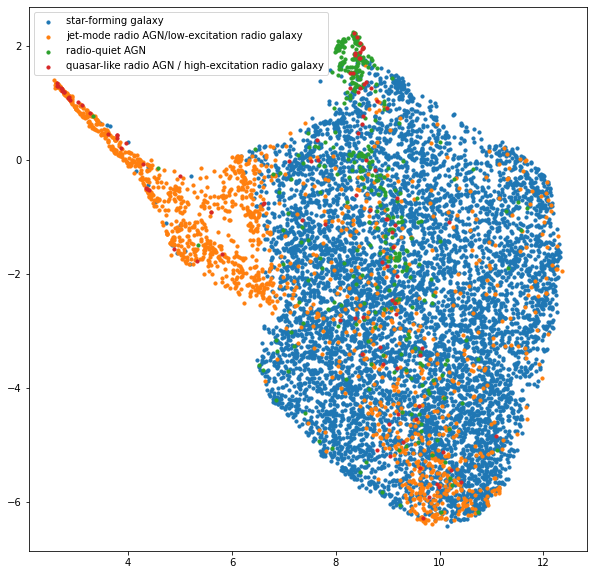

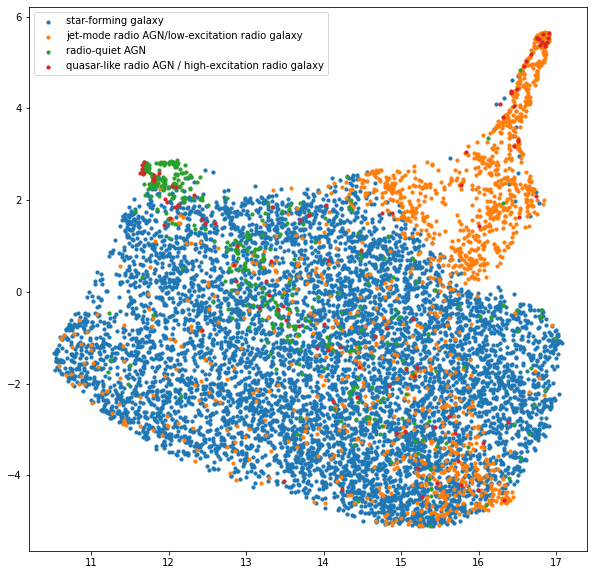

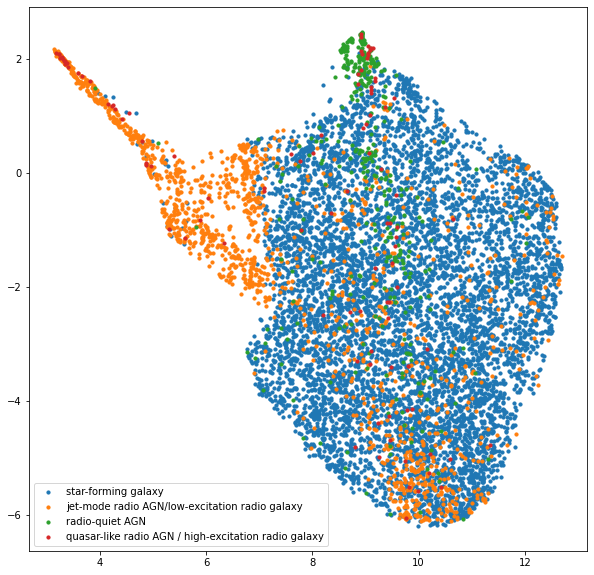

In [333]:
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in range(10,205,10):
    print(f"Working on number of neighbours {i}")
    
    reducer = umap.UMAP(n_neighbors=i)
    X_transformed = reducer.fit_transform(X_final)

    plt.figure(figsize=(10,10))
    for name in classes:
        filt = y['Classification'][redshift_filt]==name
        plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=10, label=name)

    plt.legend()
    plt.savefig(f"./Output/UMAP/{i}.png")
    

### Running it on BH

In [229]:
data_BH = pd.read_csv("../../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better.csv")

# Only selecting data with a classification
data_BH = data_BH[data_BH['Classification'] != 'Radio-loud AGN'] 

In [230]:
X_BH = data_BH.drop(columns=['Classification', 'RAJ2000', 'DEJ2000', 'SimbadName', 'E_Total_flux', 'E_Peak_flux', 'wise_ra',
       'wise_dec', 'tmass_key'])
y_BH = data_BH['Classification']

In [231]:
X_BH[['ch3_flux_corr', 'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 
      'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 
      'F_SPIRE_350', 'F_SPIRE_500']] = np.nan
X_BH = X_BH.drop(columns=['g_flux_corr', 'H_flux_corr', 'Ks_flux_corr'])

<AxesSubplot:>

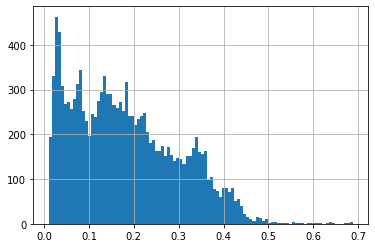

In [232]:
X_BH.Z_BEST.hist(bins=100)

In [236]:
len(redshift_filt_BH)

13162

In [237]:
redshift_filt_BH = (X_BH.Z_BEST >z) & (X_BH.Z_BEST <(z+delta_z))
X_BH_sliced = X_BH[redshift_filt_BH]

In [238]:
X_BH_filled = imp.transform(X_BH_sliced)

/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [239]:
X_BH_final = scaler.transform(X_BH_filled)

In [240]:
embedding_BH = reducer.transform(X_BH_final)

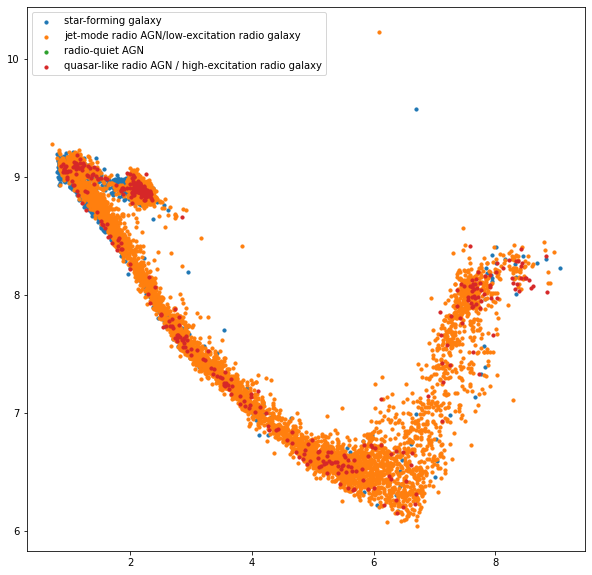

In [241]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y_BH[redshift_filt_BH]==i
    plt.scatter(embedding_BH[:,0][filt], embedding_BH[:,1][filt], s=10,label=i)
plt.legend()
#plt.xlim(xmax=5)
plt.show()